In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


**reading csv file**

In [2]:
all_data = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/london_weekdays.csv')
all_data

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,4609,310.449446,Private room,False,True,2.0,False,0,0,10.0,100.0,1,6.347654,0.445862,194.410695,13.513703,446.486289,7.994710,-0.21207,51.48667
4610,4610,265.057974,Entire home/apt,False,False,4.0,False,1,0,8.0,84.0,1,5.231706,0.463949,254.476513,17.688945,537.720506,9.628334,-0.05459,51.52018
4611,4611,142.289329,Private room,False,True,2.0,False,0,0,10.0,97.0,1,8.867238,2.675007,125.891017,8.750824,266.789887,4.777096,-0.12056,51.42875
4612,4612,372.304146,Private room,False,True,2.0,False,0,0,8.0,80.0,1,7.576798,1.682697,146.161215,10.159828,325.152018,5.822118,-0.12810,51.44023


**Deleting Columns**

In [3]:
all_data.drop('Unnamed: 0', axis=1, inplace=True)
all_data.drop(['lng', 'lat', 'rest_index_norm', 'attr_index_norm', 'attr_index_norm', 'attr_index', 'rest_index', 'dist', 'biz', 'multi'], axis=1, inplace=True)

In [4]:
all_data.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
0,570.098074,Entire home/apt,False,False,2.0,False,10.0,98.0,1,1.588990
1,297.984430,Private room,False,True,2.0,True,10.0,99.0,1,0.379262
2,336.790611,Private room,False,True,2.0,False,10.0,96.0,1,0.453178
3,226.722171,Private room,False,True,2.0,True,10.0,99.0,1,1.723977
4,256.355982,Private room,False,True,3.0,False,9.0,98.0,1,0.825417


In [5]:
a = all_data.describe()
a

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
count,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000
mean,360.230348,2.832466,9.153013,90.324447,1.123754,0.992739
std,507.782888,1.240572,1.183012,11.755838,0.581591,1.262465
min,64.676968,2.000000,2.000000,20.000000,0.000000,0.013904
25%,167.454550,2.000000,9.000000,86.000000,1.000000,0.317995
50%,256.355982,2.000000,9.000000,93.000000,1.000000,0.523462
75%,435.452386,4.000000,10.000000,99.000000,1.000000,1.047957
max,15499.894165,6.000000,10.000000,100.000000,8.000000,9.286229


**Total number of rooms offered by person capacity**

In [6]:
person_capacity_df_total = all_data.groupby('person_capacity').count()
person_capacity_df_total

,realSum,room_type,room_shared,room_private,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
person_capacity,,,,,,,,,
2.0,2891,2891,2891,2891,2891,2891,2891,2891,2891
3.0,407,407,407,407,407,407,407,407,407
4.0,822,822,822,822,822,822,822,822,822
5.0,186,186,186,186,186,186,186,186,186
6.0,308,308,308,308,308,308,308,308,308


<BarContainer object of 5 artists>

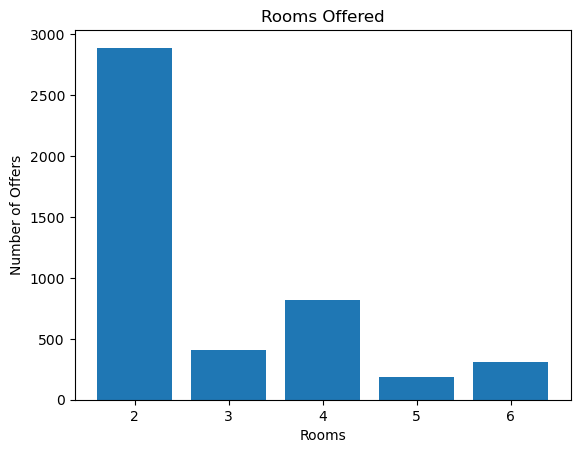

In [7]:
plt.title('Rooms Offered')
plt.xlabel('Rooms')
plt.ylabel('Number of Offers')
plt.bar(person_capacity_df_total.index, person_capacity_df_total['realSum'])

**Total rooms offered in $**

In [8]:
person_capacity_df = all_data.groupby('person_capacity').sum()
person_capacity_df

,realSum,room_shared,room_private,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
person_capacity,,,,,,,,
2.0,725077.024389,14,2242,499,26704.0,263695.0,2709,3084.230599
3.0,155916.884216,5,194,37,3652.0,36013.0,383,349.186127
4.0,423161.645382,2,151,89,7419.0,73169.0,1106,729.696578
5.0,113514.664033,2,27,16,1668.0,16342.0,320,155.235218
6.0,244432.606599,0,11,37,2789.0,27538.0,667,262.147487


<BarContainer object of 5 artists>

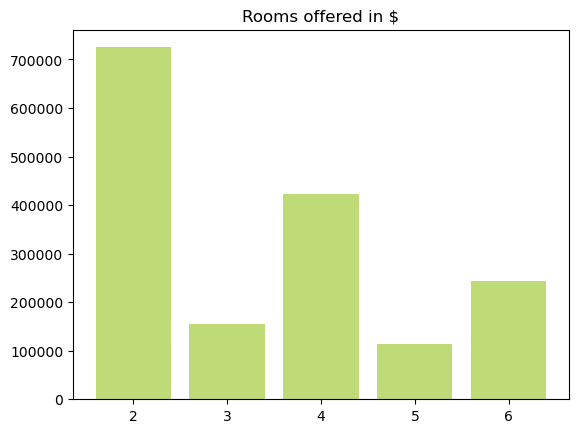

In [9]:
plt.title('Rooms offered in $')
plt.bar(person_capacity_df.index ,person_capacity_df['realSum'], color='#BFDB78')

In [10]:
all_data.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
0,570.098074,Entire home/apt,False,False,2.0,False,10.0,98.0,1,1.588990
1,297.984430,Private room,False,True,2.0,True,10.0,99.0,1,0.379262
2,336.790611,Private room,False,True,2.0,False,10.0,96.0,1,0.453178
3,226.722171,Private room,False,True,2.0,True,10.0,99.0,1,1.723977
4,256.355982,Private room,False,True,3.0,False,9.0,98.0,1,0.825417


**Different Room Types offered**

In [11]:
room_type_df = all_data.groupby('room_type').count()
room_type_df

,realSum,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
room_type,,,,,,,,,
Entire home/apt,1966,1966,1966,1966,1966,1966,1966,1966,1966
Private room,2625,2625,2625,2625,2625,2625,2625,2625,2625
Shared room,23,23,23,23,23,23,23,23,23


<BarContainer object of 3 artists>

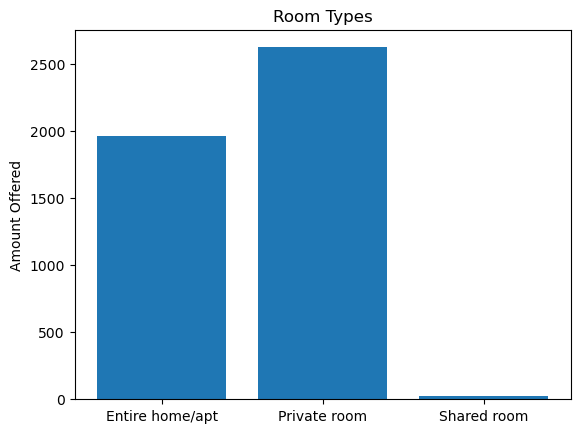

In [12]:
plt.title('Room Types')
plt.ylabel('Amount Offered')
plt.bar(room_type_df.index, room_type_df.realSum)

**Room type offered in Money**

In [13]:
pd.set_option('display.float_format', lambda x: f'{x:.0f}')
room_type_moneydf = all_data.groupby('room_type').sum().round(4)
room_type_moneydf

,realSum,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
room_type,,,,,,,,,
Entire home/apt,1084328,0,0,7137,201,17890,174902,2484,1505
Private room,573602,0,2625,5871,475,24140,239841,2678,3029
Shared room,4173,23,0,61,2,202,2014,23,46


<BarContainer object of 3 artists>

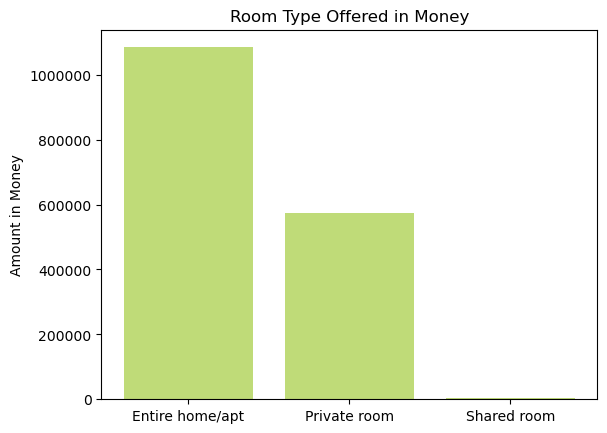

In [14]:
plt.title('Room Type Offered in Money')
plt.ticklabel_format(style='plain')
plt.ylabel('Amount in Money')
plt.bar(room_type_moneydf.index, room_type_moneydf.realSum, color='#BFDB78')


**Super Host Airbnbs Offered**

In [15]:
super_host_df = all_data.groupby('host_is_superhost').count()
super_host_df

,realSum,room_type,room_shared,room_private,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
host_is_superhost,,,,,,,,,
False,3936,3936,3936,3936,3936,3936,3936,3936,3936
True,678,678,678,678,678,678,678,678,678


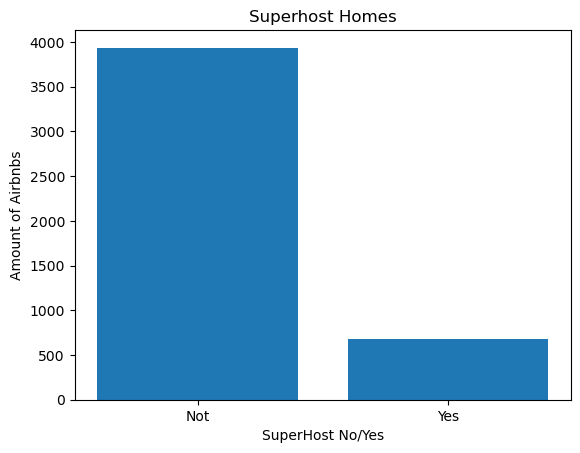

In [16]:
plt.title('Superhost Homes')
plt.xlabel('SuperHost No/Yes')
plt.ylabel('Amount of Airbnbs')
plt.bar(super_host_df.index, super_host_df.realSum)
plt.xticks([0, 1], ['Not', 'Yes'])
plt.show()


**Super Host Homes Offered in Money**

In [17]:
super_host_moneydf = all_data.groupby('host_is_superhost').sum()
super_host_moneydf

,realSum,room_shared,room_private,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,metro_dist
host_is_superhost,,,,,,,,
False,1418349,21,2150,11302,35604,351277,4410,3828
True,243754,2,475,1767,6628,65480,775,753


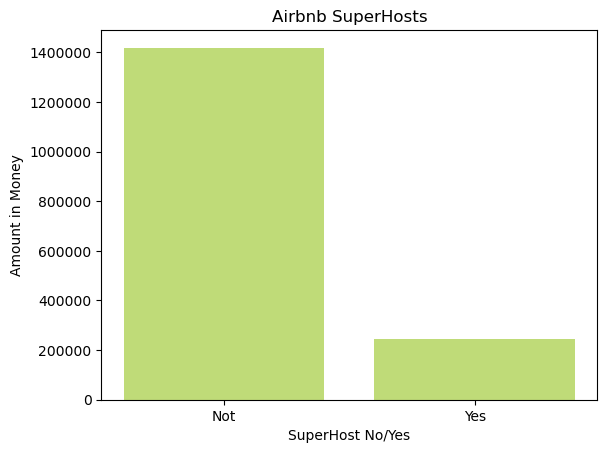

In [18]:
plt.title('Airbnb SuperHosts')
plt.xlabel('SuperHost No/Yes')
plt.ylabel('Amount in Money')
plt.bar(super_host_moneydf.index, super_host_moneydf.realSum, color='#BFDB78')
plt.ticklabel_format(style='plain')
plt.xticks([0, 1], ['Not', 'Yes'])
plt.show()